## Explortory Data Analysis

#### Imports and set-up

In [3]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# set-up
# Optional for clear plotting on Macs
%config InlineBackend.figure_format='retina'

# improve plot resolution
plt.rcParams["figure.dpi"] = 300
plt.rcParams["savefig.dpi"] = 300

color0 = '#121619' # Dark grey
color1 = '#00B050' # Green

# set a random seed just in case its needed
np.random.seed(41)

#### Summarize the data

In [72]:
# read in the files as arrays and make a dataframe
orig_df = pd.DataFrame(columns=["file","dir", "dataset", "emotion", "array"])

i = 0

# read in the files
for (root, dirs, file) in os.walk("../00_source_data/"):

    for f in file:

        if ".jpg" in f:

            # get the file name
            file_name = f.split(".")[0]

            # set the dir name
            dir_name = "original"

            # get the emotion
            emotion = root.split("/")[3]

            # get the dataset
            dataset = root.split("/")[2]

            # read in the file
            array = plt.imread(os.path.join(root, f))

            # add to the dataframe
            orig_df.loc[i] = [file_name, dir_name, dataset, emotion, array]

            i += 1


**Verify that all the images were read-in**

In [73]:
# Kaggle says there should be 35887 images

assert orig_df.shape[0] == 35887

In [74]:
# check to make sure we have no missing values

assert orig_df.isnull().sum().sum() == 0

In [75]:
# checking duplicates is harder because the arrays are not hashable

**Exploratory Plots**

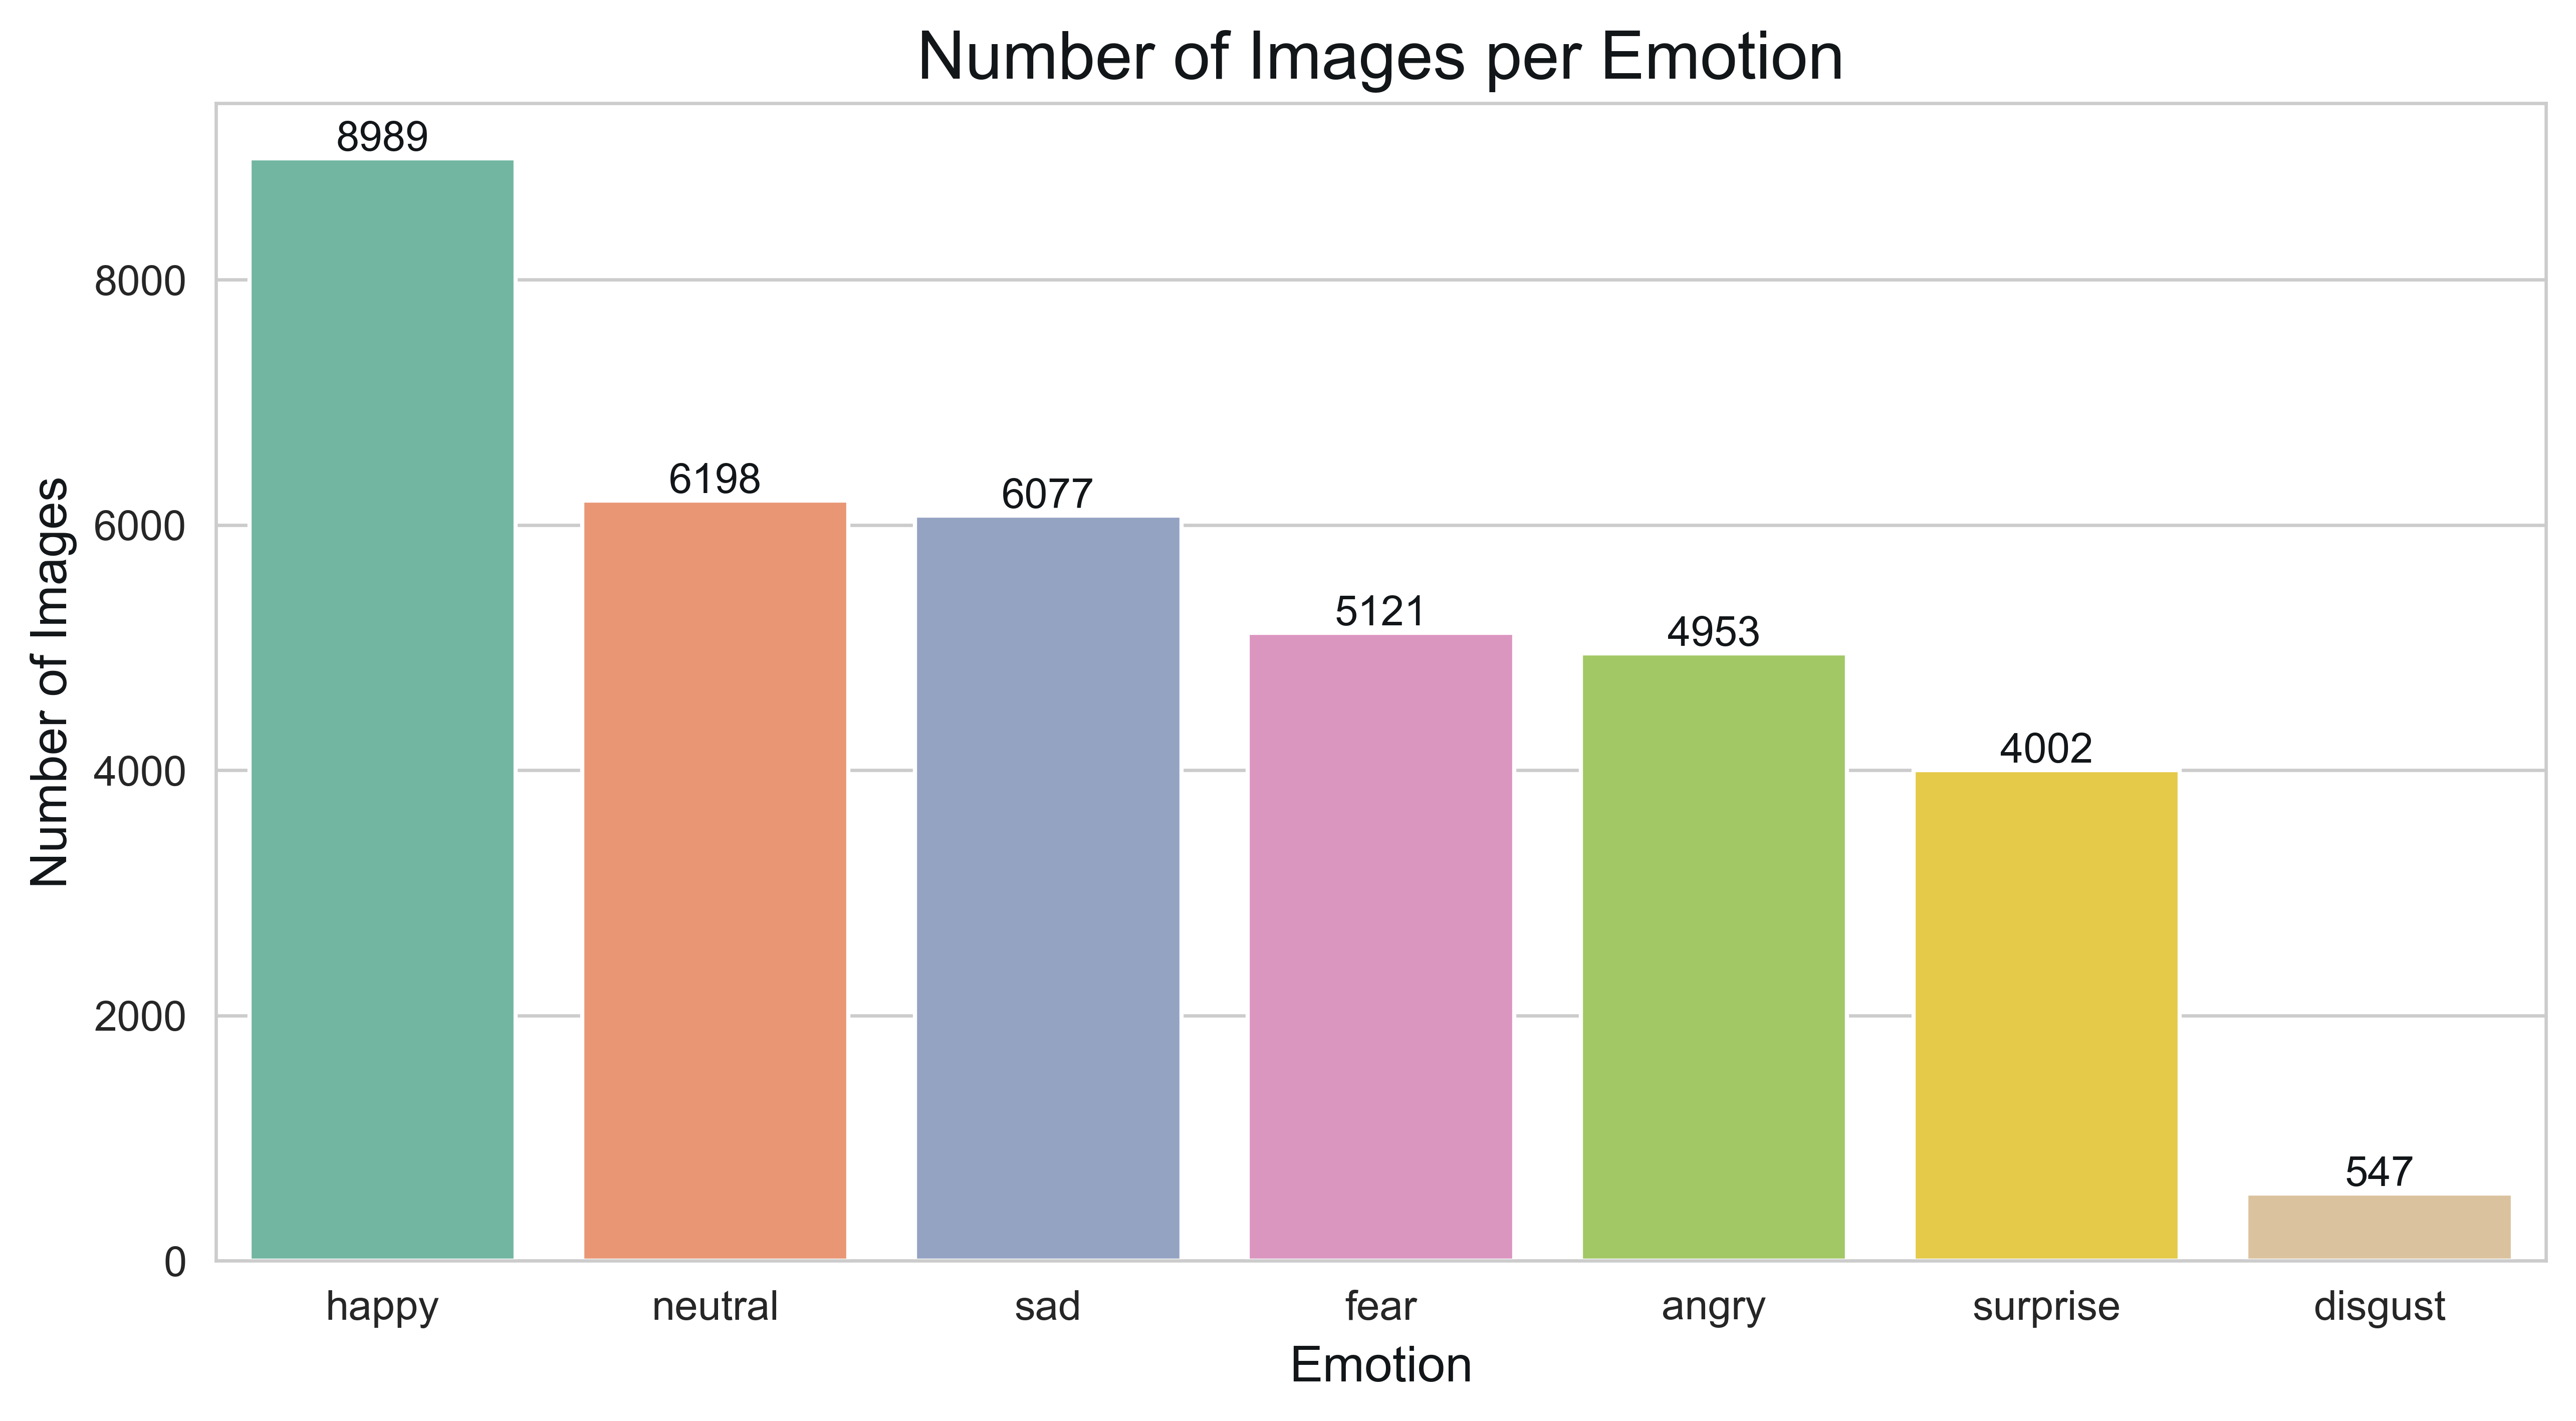

In [80]:
# bar plot of the number of images per emotion
plt.figure(figsize=(10, 5))

# set the style
sns.set_style("whitegrid")

# set the color palette
sns.set_palette("Set2")

# plot the data
sns.countplot(x="emotion", data=orig_df, order=orig_df["emotion"].value_counts().index)

# add counts to the bars
for p in plt.gca().patches:
    plt.gca().text(p.get_x() + p.get_width()/2., p.get_height(), '{:1.0f}'.format(p.get_height()), 
            fontsize=10, color=color0, ha='center', va='bottom')

# set the title and labels
plt.title("Number of Images per Emotion", fontsize=16, color=color0)
plt.xlabel("Emotion", fontsize=12, color=color0)
plt.ylabel("Number of Images", fontsize=12, color=color0)

plt.show()

In [49]:
orig_df

,file,dataset,emotion,array
0,3578,train,happy,"[[183, 184, 183, 181, 186, 170, 144, 143, 143,..."
1,16988,train,happy,"[[242, 253, 254, 254, 238, 240, 254, 231, 206,..."
2,2666,train,happy,"[[115, 126, 122, 120, 125, 143, 157, 170, 179,..."
3,5109,train,happy,"[[164, 175, 177, 176, 181, 183, 179, 179, 179,..."
4,11981,train,happy,"[[253, 254, 240, 235, 245, 238, 238, 204, 126,..."
...,...,...,...,...
35882,20761,validation,disgust,"[[86, 40, 37, 35, 46, 39, 40, 35, 43, 73, 94, ..."
35883,28710,validation,disgust,"[[156, 185, 196, 202, 203, 207, 209, 213, 213,..."
35884,23876,validation,disgust,"[[89, 35, 44, 65, 76, 71, 68, 67, 67, 72, 70, ..."
35885,9460,validation,disgust,"[[37, 43, 41, 32, 26, 22, 44, 91, 119, 103, 83..."


#### Misclassification and Duplicates

> ***After a visual inspection of some of our data, we noticed that there was a number of duplicate, or near-duplicate images. We also observed a bunch of images that were probably misclassified. We decided to go through the full dataset by hand and correct the misclassification errors, but leave the duplicates to be handled with code. The EDA below reflects the new, corrected images, but has not handled the duplicates.***